In [1]:
# Importing all the Libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
!pip install -U imbalanced-learn

  Using cached https://files.pythonhosted.org/packages/e5/4c/7557e1c2e791bd43878f8c82065bddc5798252084f26ef44527c02262af1/imbalanced_learn-0.4.3-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/c1/1c/8fa5aefe23a2fc254e9faadc10a30052c63d92f05fb59127ff0e65e4171c/scikit_learn-0.20.2-cp36-cp36m-win_amd64.whl
  Found existing installation: scikit-learn 0.19.1
    Uninstalling scikit-learn-0.19.1:


Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\scikit_learn-0.19.1-py3.6.egg-info\\dependency_links.txt'
Consider using the `--user` option or check the permissions.



In [2]:
# For loading .arff files
from scipy.io import arff
# To perform mean imputation
from sklearn.preprocessing import Imputer
#To perform kFold Cross Validation
from sklearn.model_selection import KFold
# Formatted counter of class labels
from collections import Counter
# Ordered Dictionary
from collections import OrderedDict
# Library imbalanced-learn to deal with the data imbalance. To use SMOTE oversampling
from imblearn.over_sampling import SMOTE 
# To analyze the type of missing data
import missingno as msno
# Library for performing k-NN and MICE imputations 
import fancyimpute

# To perform mean imputation
from sklearn.preprocessing import Imputer


C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
# Impoting classification models
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [4]:
# Import metrics
import random

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

In [5]:
# Read the KNN  imputed data from R
bank_data = pd.read_csv("bank_data_KNN_Imputed.csv")

In [6]:
bank_data.shape

(24996, 66)

In [43]:
bank_data.head()
bank_data.info()
bank_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24996 entries, 0 to 24995
Data columns (total 66 columns):
Unnamed: 0    24996 non-null int64
Attr1         24996 non-null float64
Attr2         24996 non-null float64
Attr3         24996 non-null float64
Attr4         24996 non-null float64
Attr5         24996 non-null float64
Attr6         24996 non-null float64
Attr7         24996 non-null float64
Attr8         24996 non-null float64
Attr9         24996 non-null float64
Attr10        24996 non-null float64
Attr11        24996 non-null float64
Attr12        24996 non-null float64
Attr13        24996 non-null float64
Attr14        24996 non-null float64
Attr15        24996 non-null float64
Attr16        24996 non-null float64
Attr17        24996 non-null float64
Attr18        24996 non-null float64
Attr19        24996 non-null float64
Attr20        24996 non-null float64
Attr21        24996 non-null float64
Attr22        24996 non-null float64
Attr23        24996 non-null float64
Attr2

,Unnamed: 0,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
count,24996.000,24996.000000,24996.000000,24996.000000,24996.000000,2.499600e+04,24996.000000,24996.000000,24996.000000,24996.000000,...,2.499600e+04,2.499600e+04,24996.000000,2.499600e+04,24996.000000,2.499600e+04,24996.000000,2.499600e+04,24996.000000,24996.000000
mean,12498.500,-0.025372,0.674962,0.048471,5.543230,-2.018982e+02,-0.121443,0.025586,8.586936,2.546014,...,6.972576e+03,-4.515381e+01,-0.106616,4.907117e+01,2.478677,2.464880e+03,17.285349,1.608532e+03,8.867342,155.956188
std,7215.868,4.833904,6.586084,6.572793,181.675407,2.927154e+04,8.789585,4.954393,297.525434,46.259065,...,7.213189e+04,7.010430e+03,12.344460,7.020721e+03,213.965125,3.233270e+04,686.380949,1.659005e+05,57.258708,1628.827561
min,1.000,-463.890000,-2.421800,-479.960000,-0.403110,-2.722100e+06,-508.410000,-463.890000,-141.410000,-3.496000,...,-1.805200e+06,-1.108300e+06,-1236.300000,-1.986900e+02,-284.380000,-1.244000e+01,-12.656000,-2.336500e+06,-1.543200,-3.726500
25%,6249.750,0.000439,0.289428,0.000000,1.007831,-5.764100e+01,-0.002953,0.002002,0.365590,1.018700,...,8.762750e-02,7.335050e-03,0.008630,8.753475e-01,0.000000,5.624375e+00,4.547297,4.400975e+01,2.946500,2.218400
50%,12498.500,0.044264,0.504160,0.174050,1.499250,-6.143950e+00,0.000000,0.053468,0.969960,1.210950,...,8.757900e+02,4.960300e-02,0.117330,9.519354e-01,0.013563,1.026600e+01,6.680917,7.624658e+01,4.847250,4.292425
75%,18747.250,0.126060,0.726875,0.383180,2.701399,4.569375e+01,0.062827,0.146955,2.471300,2.043125,...,4.583973e+03,1.273525e-01,0.285462,9.933300e-01,0.293780,2.288650e+01,10.390042,1.260900e+02,8.418650,10.075000
max,24996.000,94.280000,480.960000,22.769000,27146.000000,1.250100e+06,303.670000,186.430000,29636.000000,3876.100000,...,4.398400e+06,2.931500e+02,147.190000,1.108300e+06,23853.000000,3.660200e+06,108000.000000,2.501600e+07,7641.300000,127680.000000


In [7]:
# Convert the Target Variables to Numeric
bank_data["target"] = bank_data["target"].replace({'No':0, 'Yes':1})

In [8]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24996 entries, 0 to 24995
Data columns (total 66 columns):
Unnamed: 0    24996 non-null int64
Attr1         24996 non-null float64
Attr2         24996 non-null float64
Attr3         24996 non-null float64
Attr4         24996 non-null float64
Attr5         24996 non-null float64
Attr6         24996 non-null float64
Attr7         24996 non-null float64
Attr8         24996 non-null float64
Attr9         24996 non-null float64
Attr10        24996 non-null float64
Attr11        24996 non-null float64
Attr12        24996 non-null float64
Attr13        24996 non-null float64
Attr14        24996 non-null float64
Attr15        24996 non-null float64
Attr16        24996 non-null float64
Attr17        24996 non-null float64
Attr18        24996 non-null float64
Attr19        24996 non-null float64
Attr20        24996 non-null float64
Attr21        24996 non-null float64
Attr22        24996 non-null float64
Attr23        24996 non-null float64
Attr2

In [9]:
# Find the Target value distribution
bank_data["target"].value_counts()

0    20830
1     4166
Name: target, dtype: int64

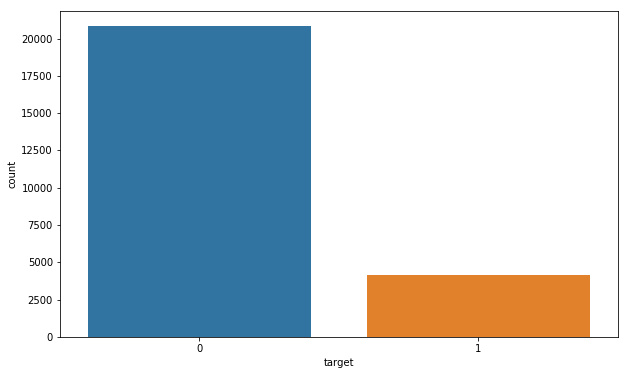

In [10]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.countplot(x='target',data = bank_data)

In [11]:
# Missing Data
bank_data.isnull().mean()

Unnamed: 0    0.0
Attr1         0.0
Attr2         0.0
Attr3         0.0
Attr4         0.0
Attr5         0.0
Attr6         0.0
Attr7         0.0
Attr8         0.0
Attr9         0.0
Attr10        0.0
Attr11        0.0
Attr12        0.0
Attr13        0.0
Attr14        0.0
Attr15        0.0
Attr16        0.0
Attr17        0.0
Attr18        0.0
Attr19        0.0
Attr20        0.0
Attr21        0.0
Attr22        0.0
Attr23        0.0
Attr24        0.0
Attr25        0.0
Attr26        0.0
Attr27        0.0
Attr28        0.0
Attr29        0.0
             ... 
Attr36        0.0
Attr37        0.0
Attr38        0.0
Attr39        0.0
Attr40        0.0
Attr41        0.0
Attr42        0.0
Attr43        0.0
Attr44        0.0
Attr45        0.0
Attr46        0.0
Attr47        0.0
Attr48        0.0
Attr49        0.0
Attr50        0.0
Attr51        0.0
Attr52        0.0
Attr53        0.0
Attr54        0.0
Attr55        0.0
Attr56        0.0
Attr57        0.0
Attr58        0.0
Attr59        0.0
Attr60    

In [12]:
bank_data.shape

(24996, 66)

In [13]:
#Removing duplicate rows
bank_data = bank_data.drop_duplicates()

In [14]:
bank_data.shape

(24996, 66)

In [52]:
data_preprocessing = bank_data.copy()
data_preprocessing.drop(['target'], axis = 1, inplace = True)

In [ ]:
#!pip install fancyimpute 

In [ ]:
# The above step shows us that there are a lot of rows which have missing data in at least one of the feature
# missing-data-rows correspond to more than 50% of the entire data.
#  Let us build sparsity Matrix
# To analyze the type of missing data
#import missingno as msno
# Library for performing k-NN and MICE imputations 

#import fancyimpute

In [15]:
bank_data.columns

Index(['Unnamed: 0', 'Attr1', 'Attr2', 'Attr3', 'Attr4', 'Attr5', 'Attr6',
       'Attr7', 'Attr8', 'Attr9', 'Attr10', 'Attr11', 'Attr12', 'Attr13',
       'Attr14', 'Attr15', 'Attr16', 'Attr17', 'Attr18', 'Attr19', 'Attr20',
       'Attr21', 'Attr22', 'Attr23', 'Attr24', 'Attr25', 'Attr26', 'Attr27',
       'Attr28', 'Attr29', 'Attr30', 'Attr31', 'Attr32', 'Attr33', 'Attr34',
       'Attr35', 'Attr36', 'Attr37', 'Attr38', 'Attr39', 'Attr40', 'Attr41',
       'Attr42', 'Attr43', 'Attr44', 'Attr45', 'Attr46', 'Attr47', 'Attr48',
       'Attr49', 'Attr50', 'Attr51', 'Attr52', 'Attr53', 'Attr54', 'Attr55',
       'Attr56', 'Attr57', 'Attr58', 'Attr59', 'Attr60', 'Attr61', 'Attr62',
       'Attr63', 'Attr64', 'target'],
      dtype='object')

In [16]:
#Generate heat map of missing values

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

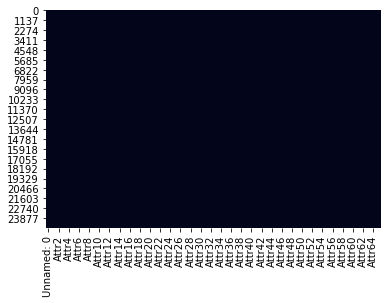

In [17]:
sns.heatmap(bank_data.isnull(), cbar=False)

In [18]:
#  we could notice a lot of sparsity for the featureAttr37 has the highest sparsity among all the features for all the dataframes. The feature Attr21 is sparse for some,
from sklearn.preprocessing import StandardScaler, Normalizer

scaler = StandardScaler()

In [19]:
# WE noticed that Attr37, Attr21, Attr60 and Attr27m attr45 had majority of missing values
bank_data.drop(["Unnamed: 0"],axis=1,inplace=True)

In [20]:
# Split the Train and Test Data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, Normalizer
X = bank_data.drop("target", axis=1)
y = bank_data["target"]

In [21]:
## Split the data into X_train, X_test, y_train, y_test with test_size = 0.20 using sklearn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [22]:
## Print the shape of X_train, X_test, y_train, y_test
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(19996, 64)
(5000, 64)
(19996,)
(5000,)


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, Normalizer
scaler = StandardScaler()
scaler.fit(X_train1.iloc[:,0:64])

X_train.iloc[:,0:64] = scaler.transform(X_train.iloc[:,0:64])
X_test.iloc[:,0:64] = scaler.transform(X_test.iloc[:,0:64])

NameError: name 'X_train1' is not defined

In [ ]:
print(X_train.head())
print(X_test.head())
print(y_train.head())
print(y_test.head())

In [24]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [111]:
#Building Models
#Buliding Logistic Regression Model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model_train=lr.fit(X_train, y_train)
y_pred_train_lr = lr.predict(X_train)
y_pred_test_lr= lr.predict(X_test)
y_prob_test_lr= lr.predict_proba(X_test)[:,1]
acc_train_lr =accuracy_score(y_true=y_train,y_pred=y_pred_train_lr)
acc_test_lr = accuracy_score(y_true=y_test,y_pred=y_pred_test_lr)                          
print("Train Logistic Accuracy :",accuracy_score(y_true=y_train,y_pred=y_pred_train_lr))
print("Test Logistic Accuracy :",accuracy_score(y_true=y_test,y_pred=y_pred_test_lr))


Train Logistic Accuracy : 0.8016603320664133
Test Logistic Accuracy : 0.7986


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


In [112]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
confusion_matrix_test_lr = confusion_matrix(y_test, y_pred_test_lr)
cr_lr = classification_report(y_test,y_pred_test_lr)
print("\n Confusion matrix \n", confusion_matrix_test_lr)
print("\n Classification report \n", classification_report(y_test,y_pred_test_lr))





 Confusion matrix 
 [[3864  302]
 [ 705  129]]

 Classification report 
              precision    recall  f1-score   support

          0       0.85      0.93      0.88      4166
          1       0.30      0.15      0.20       834

avg / total       0.75      0.80      0.77      5000



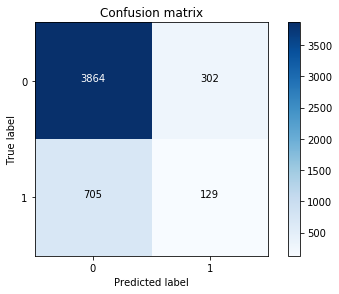

In [113]:
class_names = [0,1]
plt.figure()
plot_confusion_matrix(confusion_matrix_test_lr , classes=class_names, title='Confusion matrix')
plt.show()

In [114]:
Accuracy_Test_lr=(confusion_matrix_test_lr[0,0]+confusion_matrix_test_lr[1,1])/(confusion_matrix_test_lr[0,0]+confusion_matrix_test_lr[0,1]+confusion_matrix_test_lr[1,0]+confusion_matrix_test_lr[1,1])
TNR_Test_lr= confusion_matrix_test_lr[0,0]/(confusion_matrix_test_lr[0,0] +confusion_matrix_test_lr[0,1])
TPR_Test_lr= confusion_matrix_test_lr[1,1]/(confusion_matrix_test_lr[1,0] +confusion_matrix_test_lr[1,1])

print("Test TNR: ",TNR_Test_lr)
print("Test TPR: ",TPR_Test_lr)
print("Test Accuracy: ",Accuracy_Test_lr)

Test TNR:  0.9275084013442151
Test TPR:  0.15467625899280577
Test Accuracy:  0.7986


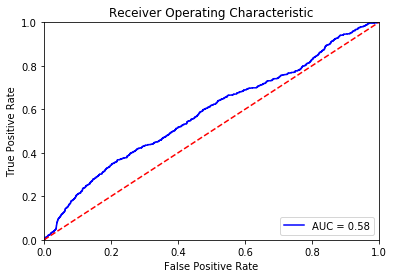

In [115]:
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(y_test, y_prob_test_lr)
roc_auc_lr = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_lr)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [116]:
print("Train Accuracy: ", acc_train_lr)
print("Test Accuracy: ", acc_test_lr)
print("Train Auc: ", roc_auc_lr)
print("Test TNR: ",TNR_Test_lr)
print("Test TPR: ",TPR_Test_lr)

Train Accuracy:  0.8016603320664133
Test Accuracy:  0.7986
Train Auc:  0.5826123546673942
Test TNR:  0.9275084013442151
Test TPR:  0.15467625899280577


In [ ]:
# Model 2 SVM
from sklearn.svm import SVC
SVC = SVC(probability=True)
model_train_svc=SVC.fit(X_train, y_train)
y_pred_train_svc = SVC.predict(X_train)
y_pred_test_svc = SVC.predict(X_test)


In [ ]:
y_prob_test_svc = SVC.predict_proba(X_test)[:,1]
acc_train_svc = accuracy_score(y_true=y_train,y_pred=y_pred_train_svc)
acc_test_svc = accuracy_score(y_true=y_test,y_pred=y_pred_test_svc)
print("Train SVC Accuracy:",accuracy_score(y_true=y_train,y_pred=y_pred_train_svc))
print("Test SVC Accuracy:",accuracy_score(y_true=y_test,y_pred=y_pred_test_svc))

In [57]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
confusion_matrix_test_svc = confusion_matrix(y_test, y_pred_test_svc)
print("\n Confusion matrix \n", confusion_matrix_test_svc)
print("\n Classification report \n", classification_report(y_test,y_pred_test_svc))



 Confusion matrix 
 [[4149   19]
 [ 119  713]]

 Classification report 
              precision    recall  f1-score   support

          0       0.97      1.00      0.98      4168
          1       0.97      0.86      0.91       832

avg / total       0.97      0.97      0.97      5000



In [ ]:
class_names = [0,1]
plt.figure()
plot_confusion_matrix(confusion_matrix_test_svc , classes=class_names, title='Confusion matrix')
plt.show()

In [ ]:
Accuracy_Test=(confusion_matrix_test_svc[0,0]+confusion_matrix_test_svc[1,1])/(confusion_matrix_test_svc[0,0]+confusion_matrix_test_svc[0,1]+confusion_matrix_test_svc[1,0]+confusion_matrix_test_svc[1,1])
TNR_Test_svc= confusion_matrix_test_svc[0,0]/(confusion_matrix_test_svc[0,0] +confusion_matrix_test_svc[0,1])
TPR_Test_svc= confusion_matrix_test_svc[1,1]/(confusion_matrix_test_svc[1,0] +confusion_matrix_test_svc[1,1])

print("Test TNR: ",TNR_Test_svc)
print("Test TPR: ",TPR_Test_svc)
print("Test Accuracy: ",Accuracy_Test)

In [ ]:
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(y_test, y_prob_test_svc)
roc_auc_svc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_svc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [61]:
print("Train Accuracy: ", acc_train_svc)
print("Test Accuracy: ", acc_test_svc)
print("Train Auc: ", roc_auc_svc)
print("Test TNR: ",TNR_Test_svc)
print("Test TPR: ",TPR_Test_svc)

Train Accuracy:  0.9803960792158432
Test Accuracy:  0.9724
Train Auc:  0.992848874898494
Test TNR:  0.9954414587332053
Test TPR:  0.8569711538461539


In [117]:
#Building the Decision Tree Model
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_pred_train_dtc = dtc.predict(X_train)
y_pred_test_dtc = dtc.predict(X_test)



In [118]:
y_prob_test_dtc= dtc.predict_proba(X_test)[:,1]
acc_train_dtc= accuracy_score(y_true=y_train,y_pred=y_pred_train_dtc)
acc_test_dtc = accuracy_score(y_true=y_test,y_pred=y_pred_test_dtc)
print("Train Decision Tree Accuracy:",accuracy_score(y_true=y_train,y_pred=y_pred_train_dtc))
print("Test Decision Tree Accuracy:",accuracy_score(y_true=y_test,y_pred=y_pred_test_dtc))

Train Decision Tree Accuracy: 1.0
Test Decision Tree Accuracy: 0.8888


In [119]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
confusion_matrix_test_dtc = confusion_matrix(y_test, y_pred_test_dtc)
print("\n Confusion matrix \n", confusion_matrix_test_dtc)
print("\n Classification report \n", classification_report(y_test,y_pred_test_dtc))





 Confusion matrix 
 [[3896  270]
 [ 286  548]]

 Classification report 
              precision    recall  f1-score   support

          0       0.93      0.94      0.93      4166
          1       0.67      0.66      0.66       834

avg / total       0.89      0.89      0.89      5000



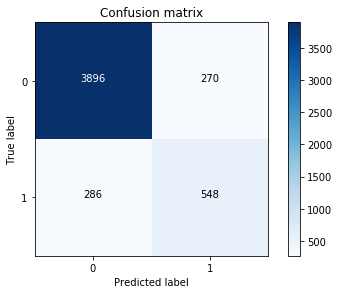

In [120]:
class_names = [0,1]
plt.figure()
plot_confusion_matrix(confusion_matrix_test_dtc , classes=class_names, title='Confusion matrix')
plt.show()

In [121]:
Accuracy_Test=(confusion_matrix_test_dtc[0,0]+confusion_matrix_test_dtc[1,1])/(confusion_matrix_test_dtc[0,0]+confusion_matrix_test_dtc[0,1]+confusion_matrix_test_dtc[1,0]+confusion_matrix_test_dtc[1,1])
TNR_Test_dtc= confusion_matrix_test_dtc[0,0]/(confusion_matrix_test_dtc[0,0] +confusion_matrix_test_dtc[0,1])
TPR_Test_dtc= confusion_matrix_test_dtc[1,1]/(confusion_matrix_test_dtc[1,0] +confusion_matrix_test_dtc[1,1])

print("Test TNR: ",TNR_Test_dtc)
print("Test TPR: ",TPR_Test_dtc)
print("Test Accuracy: ",Accuracy_Test)

Test TNR:  0.9351896303408546
Test TPR:  0.657074340527578
Test Accuracy:  0.8888


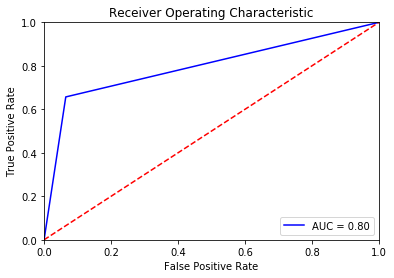

In [122]:
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(y_test, y_prob_test_dtc)
roc_auc_dtc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_dtc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [123]:
print("Train Accuracy: ", acc_train_dtc)
print("Test Accuracy: ", acc_test_dtc)
print("Train Auc: ", roc_auc_dtc)
print("Test TNR: ",TNR_Test_dtc)
print("Test TPR: ",TPR_Test_dtc)

Train Accuracy:  1.0
Test Accuracy:  0.8888
Train Auc:  0.7961319854342163
Test TNR:  0.9351896303408546
Test TPR:  0.657074340527578


In [124]:
#Building the RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
model_train_rfc= rfc.fit(X_train,y_train)
y_pred_train_rfc = rfc.predict(X_train)
y_pred_test_rfc = rfc.predict(X_test)


In [125]:
y_prob_test_rfc= rfc.predict_proba(X_test)[:,1]
acc_train_rfc = accuracy_score(y_true=y_train,y_pred=y_pred_train_rfc)
acc_test_rfc = accuracy_score(y_true=y_test,y_pred=y_pred_test_rfc)
print("Train Decision Tree Accuracy:",accuracy_score(y_true=y_train,y_pred=y_pred_train_rfc))
print("Test Decision Tree Accuracy:",accuracy_score(y_true=y_test,y_pred=y_pred_test_rfc))

Train Decision Tree Accuracy: 0.9928485697139428
Test Decision Tree Accuracy: 0.9146


In [126]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
confusion_matrix_test_rfc = confusion_matrix(y_test, y_pred_test_rfc)
print("\n Confusion matrix \n", confusion_matrix_test_rfc)
print("\n Classification report \n", classification_report(y_test,y_pred_test_rfc))





 Confusion matrix 
 [[4133   33]
 [ 394  440]]

 Classification report 
              precision    recall  f1-score   support

          0       0.91      0.99      0.95      4166
          1       0.93      0.53      0.67       834

avg / total       0.92      0.91      0.90      5000



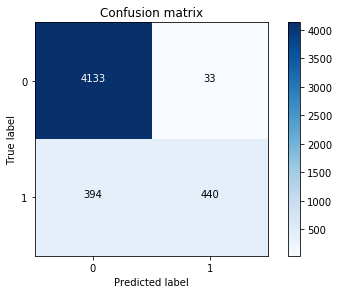

In [127]:
class_names = [0,1]
plt.figure()
plot_confusion_matrix(confusion_matrix_test_rfc , classes=class_names, title='Confusion matrix')
plt.show()

In [128]:
Accuracy_Test=(confusion_matrix_test_rfc[0,0]+confusion_matrix_test_rfc[1,1])/(confusion_matrix_test_rfc[0,0]+confusion_matrix_test_rfc[0,1]+confusion_matrix_test_rfc[1,0]+confusion_matrix_test_rfc[1,1])
TNR_Test_rfc= confusion_matrix_test_rfc[0,0]/(confusion_matrix_test_rfc[0,0] +confusion_matrix_test_rfc[0,1])
TPR_Test_rfc= confusion_matrix_test_rfc[1,1]/(confusion_matrix_test_rfc[1,0] +confusion_matrix_test_rfc[1,1])

print("Test TNR: ",TNR_Test_rfc)
print("Test TPR: ",TPR_Test_rfc)
print("Test Accuracy: ",Accuracy_Test)

Test TNR:  0.9920787325972156
Test TPR:  0.5275779376498801
Test Accuracy:  0.9146


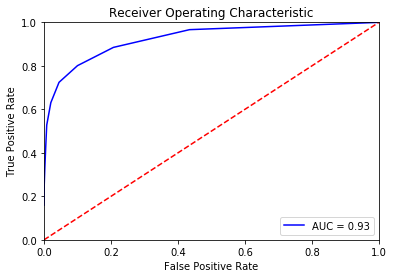

In [129]:
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(y_test, y_prob_test_rfc)
roc_auc_rfc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_rfc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [130]:
print("Train Accuracy: ", acc_train_rfc)
print("Test Accuracy: ", acc_test_rfc)
print("Train Auc: ", roc_auc_rfc)
print("Test TNR: ",TNR_Test_rfc)
print("Test TPR: ",TPR_Test_rfc)

Train Accuracy:  0.9928485697139428
Test Accuracy:  0.9146
Train Auc:  0.9257337289074166
Test TNR:  0.9920787325972156
Test TPR:  0.5275779376498801


In [53]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
rfc_grid = RandomForestClassifier(n_jobs=-1)
param_grid = {
    'bootstrap': [True],
    'max_depth': [5,10],
    'max_features': [5,8,10,12,15],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10],
    'n_estimators': [100,200]
}
rfc_cv_grid = GridSearchCV(estimator = rfc_grid, param_grid = param_grid)

In [54]:
## Fit the grid search model
rfc_cv_grid.fit(X = X_train, y = y_train)

KeyboardInterrupt: 

In [75]:
## Print best score and parameters
print(rfc_cv_grid.best_score_,rfc_cv_grid.best_params_)
best_grid = rfc_cv_grid.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)

AttributeError: 'GridSearchCV' object has no attribute 'best_score_'

In [131]:
res = pd.DataFrame([y_pred_test_lr,y_pred_test_svc,y_pred_test_dtc,y_pred_test_rfc]).T

NameError: name 'y_pred_test_svc' is not defined

In [132]:
res.columns = ['Logistic','SVC','DTC','RFC']
res

NameError: name 'res' is not defined

In [133]:
from scipy.stats import mode

In [79]:
stack = np.array([y_pred_test_lr,y_pred_test_svc,y_pred_test_dtc,y_pred_test_rfc]).T

In [80]:
stacked_pred = mode(stack,axis=1)[0]
stacked_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [81]:
print("Decistion Trees accuracy", accuracy_score(y_test,y_pred_test_dtc))
print("Logistic Regression accuracy", accuracy_score(y_test, y_pred_test_lr))
print("SVC accuracy", accuracy_score(y_test, y_pred_test_svc))
print("RFC Accuracy", accuracy_score(y_test, y_pred_test_rfc))
print("Stacked Accuracy: ", accuracy_score(y_test,stacked_pred))

Decistion Trees accuracy 1.0
Logistic Regression accuracy 0.9986
SVC accuracy 0.9724
RFC Accuracy 1.0
Stacked Accuracy:  0.9998


In [134]:
## Model Builsing using Boosing
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2),
    n_estimators=100,
    learning_rate=1)
model_train_ada= ada.fit(X_train,y_train)
y_pred_train_ada = ada.predict(X_train)
y_pred_test_ada = ada.predict(X_test)

In [135]:
y_prob_test_ada= ada.predict_proba(X_test)[:,1]

acc_train_ada = accuracy_score(y_true=y_train,y_pred=y_pred_train_ada)
acc_test_ada = accuracy_score(y_true=y_test,y_pred=y_pred_test_ada)
print("Train Decision Tree Accuracy:",accuracy_score(y_true=y_train,y_pred=y_pred_train_ada))
print("Test Decision Tree Accuracy:",accuracy_score(y_true=y_test,y_pred=y_pred_test_ada))

Train Decision Tree Accuracy: 0.9421884376875375
Test Decision Tree Accuracy: 0.9228


In [136]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
confusion_matrix_test_ada= confusion_matrix(y_test, y_pred_test_ada)
print("\n Confusion matrix \n", confusion_matrix_test_ada)
print("\n Classification report \n", classification_report(y_test,y_pred_test_ada))



 Confusion matrix 
 [[4050  116]
 [ 270  564]]

 Classification report 
              precision    recall  f1-score   support

          0       0.94      0.97      0.95      4166
          1       0.83      0.68      0.75       834

avg / total       0.92      0.92      0.92      5000



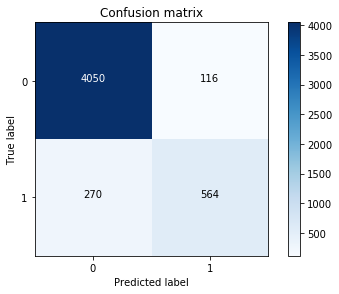

In [137]:
class_names = [0,1]
plt.figure()
plot_confusion_matrix(confusion_matrix_test_ada , classes=class_names, title='Confusion matrix')
plt.show()

In [138]:
Accuracy_Test=(confusion_matrix_test_ada[0,0]+confusion_matrix_test_ada[1,1])/(confusion_matrix_test_ada[0,0]+confusion_matrix_test_ada[0,1]+confusion_matrix_test_ada[1,0]+confusion_matrix_test_ada[1,1])
TNR_Test_ada= confusion_matrix_test_ada[0,0]/(confusion_matrix_test_ada[0,0] +confusion_matrix_test_ada[0,1])
TPR_Test_ada= confusion_matrix_test_ada[1,1]/(confusion_matrix_test_ada[1,0] +confusion_matrix_test_ada[1,1])

print("Test TNR: ",TNR_Test_ada)
print("Test TPR: ",TPR_Test_ada)
print("Test Accuracy: ",Accuracy_Test)

Test TNR:  0.9721555448871819
Test TPR:  0.6762589928057554
Test Accuracy:  0.9228


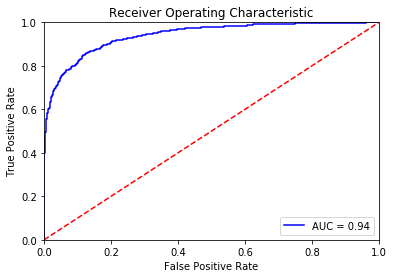

In [139]:
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(y_test, y_prob_test_ada)
roc_auc_ada = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_ada)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [140]:
print("Train Accuracy: ", acc_train_ada)
print("Test Accuracy: ", acc_test_ada)
print("Train Auc: ", roc_auc_ada)
print("Test TNR: ",TNR_Test_ada)
print("Test TPR: ",TPR_Test_ada)

Train Accuracy:  0.9421884376875375
Test Accuracy:  0.9228
Train Auc:  0.940001335465473
Test TNR:  0.9721555448871819
Test TPR:  0.6762589928057554


In [83]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators' : [100, 150, 200],
              'learning_rate' : [0.1, 0.5, 0.9]}

Adaboost_model_clf = GridSearchCV(AdaBoostClassifier(
            DecisionTreeClassifier(max_depth=2)), param_grid, n_jobs=-1)

In [84]:
%time Adaboost_model_clf.fit(X_train, y_train)
#Wall time: 53min 47s
#GridSearchCV(cv=None, error_score='raise',
#      estimator=AdaBoostClassifier(algorithm='SAMME.R',
#         base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
#            max_features=None, max_leaf_nodes=None,
#            min_impurity_decrease=0.0, min_impurity_split=None,
#            min_samples_leaf=1, min_samples_split=2,
#            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
#            splitter='best'),
#          learning_rate=1.0, n_estimators=50, random_state=None),
#       fit_params=None, iid=True, n_jobs=-1,
#       param_grid={'n_estimators': [100, 150, 200], 'learning_rate': [0.1, 0.5, 0.9]},
#       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
#      scoring=None, verbose=0)

Wall time: 12min 38s


GridSearchCV(cv=None, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [100, 150, 200], 'learning_rate': [0.1, 0.5, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [85]:
# Find best model
final_ada_model = Adaboost_model_clf.best_estimator_
print (Adaboost_model_clf.best_score_, Adaboost_model_clf.best_params_)

0.9530406081216243 {'learning_rate': 0.5, 'n_estimators': 200}


In [142]:
# Build ada model using above Hyper parameters
## Model Builsing using Boosing
from sklearn.ensemble import AdaBoostClassifier
ada_final = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2),
    n_estimators=200,
    learning_rate=0.5)
model_train_ada_final= ada_final.fit(X_train,y_train)
y_pred_train_ada_final = ada_final.predict(X_train)
y_pred_test_ada_final = ada_final.predict(X_test)

In [143]:
y_prob_test_ada_final= ada_final.predict_proba(X_test)[:,1]
acc_train_ada_final = accuracy_score(y_true=y_train,y_pred=y_pred_train_ada_final)
acc_test_ada_final = accuracy_score(y_true=y_test,y_pred=y_pred_test_ada_final)
print("Train Decision Tree Accuracy:",accuracy_score(y_true=y_train,y_pred=y_pred_train_ada_final))
print("Test Decision Tree Accuracy:",accuracy_score(y_true=y_test,y_pred=y_pred_test_ada_final))

Train Decision Tree Accuracy: 0.9518403680736147
Test Decision Tree Accuracy: 0.9316


In [144]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
confusion_matrix_test_ada_final= confusion_matrix(y_test, y_pred_test_ada_final)
print("\n Confusion matrix \n", confusion_matrix_test_ada_final)
print("\n Classification report \n", classification_report(y_test,y_pred_test_ada_final))


 Confusion matrix 
 [[4099   67]
 [ 275  559]]

 Classification report 
              precision    recall  f1-score   support

          0       0.94      0.98      0.96      4166
          1       0.89      0.67      0.77       834

avg / total       0.93      0.93      0.93      5000



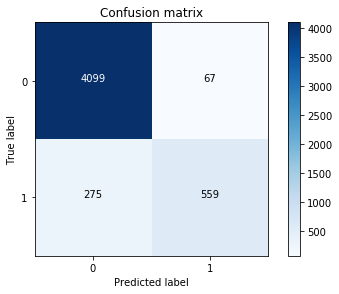

In [145]:
class_names = [0,1]
plt.figure()
plot_confusion_matrix(confusion_matrix_test_ada_final , classes=class_names, title='Confusion matrix')
plt.show()

In [146]:
Accuracy_Test=(confusion_matrix_test_ada_final[0,0]+confusion_matrix_test_ada_final[1,1])/(confusion_matrix_test_ada_final[0,0]+confusion_matrix_test_ada_final[0,1]+confusion_matrix_test_ada_final[1,0]+confusion_matrix_test_ada_final[1,1])
TNR_Test_ada_final= confusion_matrix_test_ada_final[0,0]/(confusion_matrix_test_ada_final[0,0] +confusion_matrix_test_ada_final[0,1])
TPR_Test_ada_final= confusion_matrix_test_ada_final[1,1]/(confusion_matrix_test_ada_final[1,0] +confusion_matrix_test_ada_final[1,1])

print("Test TNR: ",TNR_Test_ada_final)
print("Test TPR: ",TPR_Test_ada_final)
print("Test Accuracy: ",Accuracy_Test)

Test TNR:  0.9839174267882861
Test TPR:  0.670263788968825
Test Accuracy:  0.9316


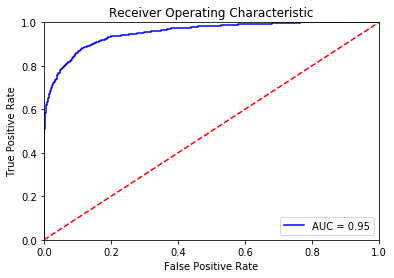

In [147]:
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(y_test, y_prob_test_ada_final)
roc_auc_ada_final = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_ada_final)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [148]:
print("Train Accuracy: ", acc_train_ada_final)
print("Train Accuracy: ", acc_train_ada_final)
print("Train Auc: ", roc_auc_ada_final)
print("Test TNR: ",TNR_Test_ada_final)
print("Test TPR: ",TPR_Test_ada_final)

Train Accuracy:  0.9518403680736147
Train Accuracy:  0.9518403680736147
Train Auc:  0.9522481870480572
Test TNR:  0.9839174267882861
Test TPR:  0.670263788968825


In [149]:
## Model Building uisng Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gbm =  GradientBoostingClassifier(n_estimators=150,
                                        learning_rate=0.1,
                                        subsample=0.8)
model_train_gbm= gbm.fit(X_train,y_train)
y_pred_train_gbm = gbm.predict(X_train)
y_pred_test_gbm = gbm.predict(X_test)

In [150]:
y_prob_test_gbm= gbm.predict_proba(X_test)[:,1]
acc_train_gbm = accuracy_score(y_true=y_train,y_pred=y_pred_train_gbm)
acc_test_gbm = accuracy_score(y_true=y_test,y_pred=y_pred_test_gbm)
print("Train Decision Tree Accuracy:",accuracy_score(y_true=y_train,y_pred=y_pred_train_gbm))
print("Test Decision Tree Accuracy:",accuracy_score(y_true=y_test,y_pred=y_pred_test_gbm))

Train Decision Tree Accuracy: 0.9337367473494699
Test Decision Tree Accuracy: 0.92


In [151]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
confusion_matrix_test_gbm= confusion_matrix(y_test, y_pred_test_gbm)
print("\n Confusion matrix \n", confusion_matrix_test_gbm)
print("\n Classification report \n", classification_report(y_test,y_pred_test_gbm))


 Confusion matrix 
 [[4135   31]
 [ 369  465]]

 Classification report 
              precision    recall  f1-score   support

          0       0.92      0.99      0.95      4166
          1       0.94      0.56      0.70       834

avg / total       0.92      0.92      0.91      5000



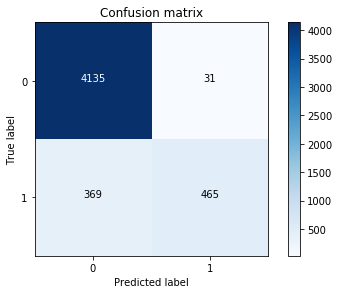

In [152]:
class_names = [0,1]
plt.figure()
plot_confusion_matrix(confusion_matrix_test_gbm , classes=class_names, title='Confusion matrix')
plt.show()

In [153]:
Accuracy_Test=(confusion_matrix_test_gbm[0,0]+confusion_matrix_test_gbm[1,1])/(confusion_matrix_test_gbm[0,0]+confusion_matrix_test_gbm[0,1]+confusion_matrix_test_gbm[1,0]+confusion_matrix_test_gbm[1,1])
TNR_Test_gbm= confusion_matrix_test_gbm[0,0]/(confusion_matrix_test_gbm[0,0] +confusion_matrix_test_gbm[0,1])
TPR_Test_gbm= confusion_matrix_test_gbm[1,1]/(confusion_matrix_test_gbm[1,0] +confusion_matrix_test_gbm[1,1])

print("Test TNR: ",TNR_Test_gbm)
print("Test TPR: ",TPR_Test_gbm)
print("Test Accuracy: ",Accuracy_Test)

Test TNR:  0.9925588094095055
Test TPR:  0.5575539568345323
Test Accuracy:  0.92


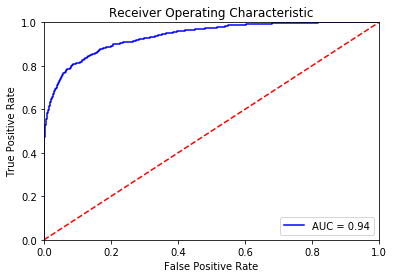

In [154]:
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(y_test, y_prob_test_gbm)
roc_auc_gbm = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_gbm)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [155]:
print("Train Accuracy: ", acc_train_gbm)
print("Test Accuracy: ", acc_test_gbm)
print("Train Auc: ", roc_auc_gbm)
print("Test TNR: ",TNR_Test_gbm)
print("Test TPR: ",TPR_Test_gbm)

Train Accuracy:  0.9337367473494699
Test Accuracy:  0.92
Train Auc:  0.936178565548905
Test TNR:  0.9925588094095055
Test TPR:  0.5575539568345323


In [105]:
#Grid Search Cross validation
from sklearn.model_selection import GridSearchCV

# Model in use
GBM_Grid = GradientBoostingClassifier() 
 
# Use a grid over parameters of interest
param_grid = { 
           "n_estimators" : [100,150,200,250],
           "max_depth" : [5, 10],
           "learning_rate" : [0.1,0.5,0.9]}
 
GBM_CV = GridSearchCV(estimator=GBM_Grid, param_grid=param_grid)

In [106]:
%time GBM_CV.fit(X_train, y_train)

Wall time: 1h 23min 55s


GridSearchCV(cv=None, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [100, 150, 200, 250], 'max_depth': [5, 10], 'learning_rate': [0.1, 0.5, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [108]:
# Find best model
final_gbm_model = GBM_CV.best_estimator_
print (GBM_CV.best_score_, GBM_CV.best_params_)

0.9582916583316663 {'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 250}


In [156]:
## Model Building uisng Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gbm_final =  GradientBoostingClassifier(n_estimators=250,
                                        learning_rate=0.5,
                                        subsample=0.8,
                                        max_depth=5)
model_train_gbm_final= gbm_final.fit(X_train,y_train)
y_pred_train_gbm_final = gbm_final.predict(X_train)
y_pred_test_gbm_final = gbm_final.predict(X_test)

In [157]:
y_prob_test_gbm_final = gbm_final.predict_proba(X_test)[:,1]
acc_train_gbm_final = accuracy_score(y_true=y_train,y_pred=y_pred_train_gbm_final)
acc_test_gbm_final = accuracy_score(y_true=y_test,y_pred=y_pred_test_gbm_final)
print("Train Decision Tree Accuracy:",accuracy_score(y_true=y_train,y_pred=y_pred_train_gbm_final))
print("Test Decision Tree Accuracy:",accuracy_score(y_true=y_test,y_pred=y_pred_test_gbm_final))

Train Decision Tree Accuracy: 0.9996999399879976
Test Decision Tree Accuracy: 0.94


In [158]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
confusion_matrix_test_gbm_final= confusion_matrix(y_test, y_pred_test_gbm_final)
print("\n Confusion matrix \n", confusion_matrix_test_gbm_final)
print("\n Classification report \n", classification_report(y_test,y_pred_test_gbm_final))


 Confusion matrix 
 [[4087   79]
 [ 221  613]]

 Classification report 
              precision    recall  f1-score   support

          0       0.95      0.98      0.96      4166
          1       0.89      0.74      0.80       834

avg / total       0.94      0.94      0.94      5000



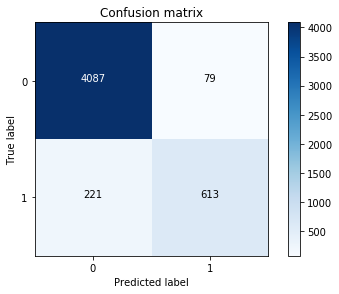

In [159]:
class_names = [0,1]
plt.figure()
plot_confusion_matrix(confusion_matrix_test_gbm_final , classes=class_names, title='Confusion matrix')
plt.show()

In [160]:
Accuracy_Test=(confusion_matrix_test_gbm_final[0,0]+confusion_matrix_test_gbm_final[1,1])/(confusion_matrix_test_gbm_final[0,0]+confusion_matrix_test_gbm[0,1]+confusion_matrix_test_gbm[1,0]+confusion_matrix_test_gbm_final[1,1])
TNR_Test_gbm_final= confusion_matrix_test_gbm_final[0,0]/(confusion_matrix_test_gbm_final[0,0] +confusion_matrix_test_gbm_final[0,1])
TPR_Test_gbm_final= confusion_matrix_test_gbm_final[1,1]/(confusion_matrix_test_gbm_final[1,0] +confusion_matrix_test_gbm_final[1,1])

print("Test TNR: ",TNR_Test_gbm_final)
print("Test TPR: ",TPR_Test_gbm_final)
print("Test Accuracy: ",Accuracy_Test)

Test TNR:  0.9810369659145464
Test TPR:  0.7350119904076738
Test Accuracy:  0.9215686274509803


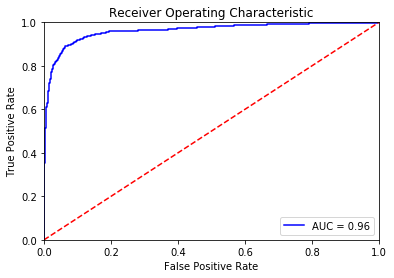

In [161]:
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(y_test, y_prob_test_gbm_final)
roc_auc_gbm_final = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_gbm_final)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [162]:
print("Train Accuracy: ", acc_train_gbm_final)
print("Test Accuracy: ", acc_test_gbm_final)
print("Train Auc: ", roc_auc_gbm_final)
print("Test TNR: ",TNR_Test_gbm_final)
print("Test TPR: ",TPR_Test_gbm_final)

Train Accuracy:  0.9996999399879976
Test Accuracy:  0.94
Train Auc:  0.9611886103215364
Test TNR:  0.9810369659145464
Test TPR:  0.7350119904076738


In [163]:
# Build Model XGBOOST
from xgboost import XGBClassifier
xgb = XGBClassifier()
model_train_xgb= xgb.fit(X_train,y_train)
y_pred_train_xgb = xgb.predict(X_train)
y_pred_test_xgb = xgb.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [164]:
y_prob_test_xgb= xgb.predict_proba(X_test)[:,1]
acc_train_xgb = accuracy_score(y_true=y_train,y_pred=y_pred_train_xgb)
acc_test_xgb = accuracy_score(y_true=y_test,y_pred=y_pred_test_xgb)
print("Train Decision Tree Accuracy:",accuracy_score(y_true=y_train,y_pred=y_pred_train_xgb))
print("Test Decision Tree Accuracy:",accuracy_score(y_true=y_test,y_pred=y_pred_test_xgb))

Train Decision Tree Accuracy: 0.9193338667733547
Test Decision Tree Accuracy: 0.9132


In [165]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
confusion_matrix_test_xgb= confusion_matrix(y_test, y_pred_test_xgb)
cr = classification_report(y_test,y_pred_test_xgb)
print("\n Confusion matrix \n", confusion_matrix_test_xgb)
print("\n Classification report \n", classification_report(y_test,y_pred_test_xgb))


 Confusion matrix 
 [[4141   25]
 [ 409  425]]

 Classification report 
              precision    recall  f1-score   support

          0       0.91      0.99      0.95      4166
          1       0.94      0.51      0.66       834

avg / total       0.92      0.91      0.90      5000



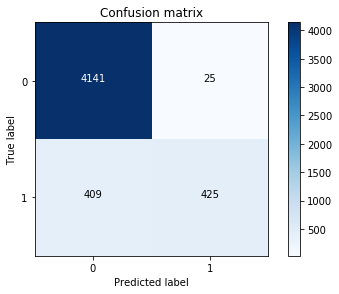

In [166]:
class_names = [0,1]
plt.figure()
plot_confusion_matrix(confusion_matrix_test_xgb , classes=class_names, title='Confusion matrix')
plt.show()

In [167]:
Accuracy_Test=(confusion_matrix_test_xgb[0,0]+confusion_matrix_test_xgb[1,1])/(confusion_matrix_test_xgb[0,0]+confusion_matrix_test_gbm[0,1]+confusion_matrix_test_xgb[1,0]+confusion_matrix_test_xgb[1,1])
TNR_Test_xgb= confusion_matrix_test_gbm[0,0]/(confusion_matrix_test_xgb[0,0] +confusion_matrix_test_xgb[0,1])
TPR_Test_xgb= confusion_matrix_test_gbm[1,1]/(confusion_matrix_test_xgb[1,0] +confusion_matrix_test_xgb[1,1])

print("Test TNR: ",TNR_Test_xgb)
print("Test TPR: ",TPR_Test_xgb)
print("Test Accuracy: ",Accuracy_Test)

Test TNR:  0.9925588094095055
Test TPR:  0.5575539568345323
Test Accuracy:  0.9121054734318818


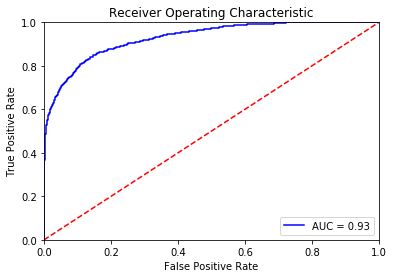

In [168]:
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(y_test, y_prob_test_xgb)
roc_auc_xgb = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_xgb)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [169]:
print("Train Accuracy: ", acc_train_xgb)
print("Test Accuracy: ", acc_test_xgb)
print("Train Auc: ", roc_auc_xgb)
print("Test TNR: ",TNR_Test_xgb)
print("Test TPR: ",TPR_Test_xgb)

Train Accuracy:  0.9193338667733547
Test Accuracy:  0.9132
Train Auc:  0.928768171252724
Test TNR:  0.9925588094095055
Test TPR:  0.5575539568345323


In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Model in use
xgb_Grid = xgb.XGBClassifier()
 
# Use a grid over parameters of interest
param_grid = { 
           "nthread":[4,5], 
           "max_depth" : [5, 10],
           "learning_rate" : [0.1,0.05,0.2],
           "n_estimators": [3,5],
           "objective":["binary:logistic"]}
 
xgb_clf = GridSearchCV(estimator=xgb_Grid, param_grid=param_grid)

In [ ]:
%time xgb_clf.fit(X_train, y_train)

In [ ]:
# Find best model
final_gbm_model = xgb_clf.best_estimator_
print (xgb_clf.best_score_, xgb_clf.best_params_)

In [170]:
# Build bagging Model 
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
bag = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
model_train_bag= bag.fit(X_train,y_train)
y_pred_train_bag = bag.predict(X_train)
y_pred_test_bag = bag.predict(X_test)

In [171]:
y_prob_test_bag= bag.predict_proba(X_test)[:,1]

acc_train_bag = accuracy_score(y_true=y_train,y_pred=y_pred_train_bag)
acc_test_bag = accuracy_score(y_true=y_test,y_pred=y_pred_test_bag)
print("Train Decision Tree Accuracy:",accuracy_score(y_true=y_train,y_pred=y_pred_train_bag))
print("Test Decision Tree Accuracy:",accuracy_score(y_true=y_test,y_pred=y_pred_test_bag))

Train Decision Tree Accuracy: 0.16663332666533306
Test Decision Tree Accuracy: 0.1668


In [172]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
confusion_matrix_test_bag= confusion_matrix(y_test, y_pred_test_bag)
print("\n Confusion matrix \n", confusion_matrix_test_bag)
print("\n Classification report \n", classification_report(y_test,y_pred_test_bag))


 Confusion matrix 
 [[   0 4166]
 [   0  834]]

 Classification report 
              precision    recall  f1-score   support

          0       0.00      0.00      0.00      4166
          1       0.17      1.00      0.29       834

avg / total       0.03      0.17      0.05      5000



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


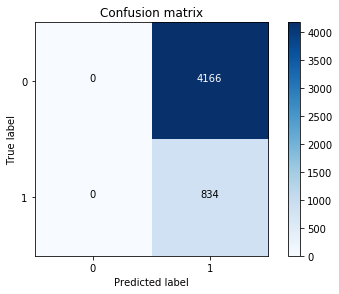

In [173]:
class_names = [0,1]
plt.figure()
plot_confusion_matrix(confusion_matrix_test_bag , classes=class_names, title='Confusion matrix')
plt.show()

In [174]:
Accuracy_Test=(confusion_matrix_test_bag[0,0]+confusion_matrix_test_bag[1,1])/(confusion_matrix_test_bag[0,0]+confusion_matrix_test_bag[0,1]+confusion_matrix_test_bag[1,0]+confusion_matrix_test_bag[1,1])
TNR_Test_bag= confusion_matrix_test_bag[0,0]/(confusion_matrix_test_bag[0,0] +confusion_matrix_test_bag[0,1])
TPR_Test_bag= confusion_matrix_test_bag[1,1]/(confusion_matrix_test_bag[1,0] +confusion_matrix_test_bag[1,1])

print("Test TNR: ",TNR_Test_bag)
print("Test TPR: ",TPR_Test_bag)
print("Test Accuracy: ",Accuracy_Test)

Test TNR:  0.0
Test TPR:  1.0
Test Accuracy:  0.1668


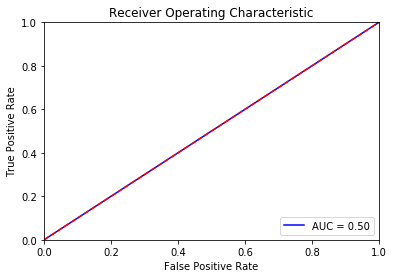

In [175]:
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(y_test, y_prob_test_bag)
roc_auc_bag = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_bag)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [176]:
print("Train Accuracy: ", acc_train_bag)
print("Test Accuracy: ", acc_test_bag)
print("Train Auc: ", roc_auc_bag)
print("Test TNR: ",TNR_Test_bag)
print("Test TPR: ",TPR_Test_bag)

Train Accuracy:  0.16663332666533306
Test Accuracy:  0.1668
Train Auc:  0.5
Test TNR:  0.0
Test TPR:  1.0


In [177]:
# Build Balanced bagging classifier model
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn import tree
bbc = BalancedBaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
model_train_bbc= bbc.fit(X_train,y_train)
y_pred_train_bbc = bbc.predict(X_train)
y_pred_test_bbc = bbc.predict(X_test)

In [178]:
y_prob_test_bbc= bbc.predict_proba(X_test)[:,1]

acc_train_bbc = accuracy_score(y_true=y_train,y_pred=y_pred_train_bbc)
acc_test_bbc = accuracy_score(y_true=y_test,y_pred=y_pred_test_bbc) 

print("Train Decision Tree Accuracy:",accuracy_score(y_true=y_train,y_pred=y_pred_train_bbc))
print("Test Decision Tree Accuracy:",accuracy_score(y_true=y_test,y_pred=y_pred_test_bbc))

Train Decision Tree Accuracy: 0.9350870174034807
Test Decision Tree Accuracy: 0.878


In [179]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
confusion_matrix_test_bbc= confusion_matrix(y_test, y_pred_test_bbc)
print("\n Confusion matrix \n", confusion_matrix_test_bbc)
print("\n Classification report \n", classification_report(y_test,y_pred_test_bbc))


 Confusion matrix 
 [[3717  449]
 [ 161  673]]

 Classification report 
              precision    recall  f1-score   support

          0       0.96      0.89      0.92      4166
          1       0.60      0.81      0.69       834

avg / total       0.90      0.88      0.88      5000



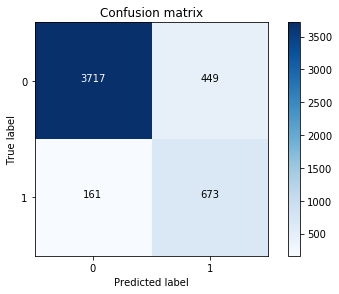

In [180]:
class_names = [0,1]
plt.figure()
plot_confusion_matrix(confusion_matrix_test_bbc , classes=class_names, title='Confusion matrix')
plt.show()

In [181]:
Accuracy_Test=(confusion_matrix_test_bbc[0,0]+confusion_matrix_test_bbc[1,1])/(confusion_matrix_test_bbc[0,0]+confusion_matrix_test_bbc[0,1]+confusion_matrix_test_bbc[1,0]+confusion_matrix_test_bbc[1,1])
TNR_Test_bbc= confusion_matrix_test_bbc[0,0]/(confusion_matrix_test_bbc[0,0] +confusion_matrix_test_bbc[0,1])
TPR_Test_bbc= confusion_matrix_test_bbc[1,1]/(confusion_matrix_test_bbc[1,0] +confusion_matrix_test_bbc[1,1])

print("Test TNR: ",TNR_Test_bbc)
print("Test TPR: ",TPR_Test_bbc)
print("Test Accuracy: ",Accuracy_Test)

Test TNR:  0.8922227556409026
Test TPR:  0.8069544364508393
Test Accuracy:  0.878


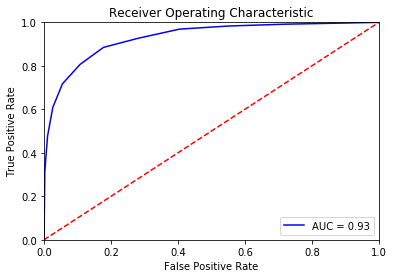

In [182]:
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(y_test, y_prob_test_bbc)
roc_auc_bbc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_bbc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [183]:
print("Train Accuracy: ", acc_train_bbc)
print("Test Accuracy: ", acc_test_bbc)
print("Train Auc: ", roc_auc_bbc)
print("Test TNR: ",TNR_Test_bbc)
print("Test TPR: ",TPR_Test_bbc)

Train Accuracy:  0.9350870174034807
Test Accuracy:  0.878
Train Auc:  0.9299990156698452
Test TNR:  0.8922227556409026
Test TPR:  0.8069544364508393


In [184]:
## Aplying SMOTE
# Find the Target value distribution
bank_data["target"].value_counts()

0    20830
1     4166
Name: target, dtype: int64

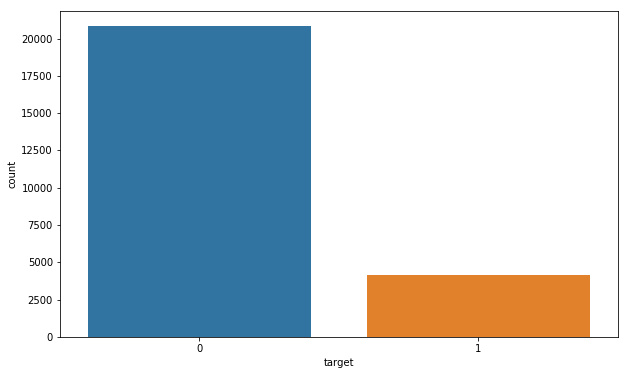

In [185]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.countplot(x='target',data = bank_data)

In [186]:
# Data Imputation
# Impute missing values with mean Imputation
from sklearn.preprocessing import Imputer
mean_imputer = Imputer(strategy="mean")
bank_data_mean_imputed1 = bank_data.copy()
bank_data_mean_imputed1.iloc[:,0:64] = mean_imputer.fit_transform(bank_data_mean_imputed.iloc[:,0:64])

NameError: name 'bank_data_mean_imputed' is not defined

In [187]:
bank_data_mean_imputed1.head()
bank_data_mean_imputed1.isnull().sum()

Attr1     0
Attr2     0
Attr3     0
Attr4     0
Attr5     0
Attr6     0
Attr7     0
Attr8     0
Attr9     0
Attr10    0
Attr11    0
Attr12    0
Attr13    0
Attr14    0
Attr15    0
Attr16    0
Attr17    0
Attr18    0
Attr19    0
Attr20    0
Attr21    0
Attr22    0
Attr23    0
Attr24    0
Attr25    0
Attr26    0
Attr27    0
Attr28    0
Attr29    0
Attr30    0
         ..
Attr36    0
Attr37    0
Attr38    0
Attr39    0
Attr40    0
Attr41    0
Attr42    0
Attr43    0
Attr44    0
Attr45    0
Attr46    0
Attr47    0
Attr48    0
Attr49    0
Attr50    0
Attr51    0
Attr52    0
Attr53    0
Attr54    0
Attr55    0
Attr56    0
Attr57    0
Attr58    0
Attr59    0
Attr60    0
Attr61    0
Attr62    0
Attr63    0
Attr64    0
target    0
Length: 65, dtype: int64

In [188]:
# Split the Train and Test Data
from sklearn.model_selection import train_test_split
# Split the data into X and y
X = bank_data_mean_imputed1.drop("target", axis=1)
y = bank_data_mean_imputed1["target"]

print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

Shape of X: (24996, 64)
Shape of y: (24996,)


In [189]:
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=1)

print("Number transactions X_train dataset: ", X_train1.shape)
print("Number transactions y_train dataset: ", y_train1.shape)
print("Number transactions X_test dataset: ", X_test1.shape)
print("Number transactions y_test dataset: ", y_test1.shape)

Number transactions X_train dataset:  (19996, 64)
Number transactions y_train dataset:  (19996,)
Number transactions X_test dataset:  (5000, 64)
Number transactions y_test dataset:  (5000,)


In [190]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train1==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train1==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train1, y_train1)

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 3334
Before OverSampling, counts of label '0': 16662 

After OverSampling, the shape of train_X: (33324, 64)
After OverSampling, the shape of train_y: (33324,) 

After OverSampling, counts of label '1': 16662
After OverSampling, counts of label '0': 16662


In [191]:
## Model Builsing using Boosing
from sklearn.ensemble import AdaBoostClassifier
ada_smote = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2),
    n_estimators=100,
    learning_rate=1)
model_train_ada= ada_smote.fit(X_train_res,y_train_res)
y_pred_train_ada_smote = ada_smote.predict(X_train_res)
y_pred_test_ada_smote = ada_smote.predict(X_test1)

In [192]:
y_prob_test_ada_smote= ada_smote.predict_proba(X_test1)[:,1]

acc_train_ada_smote = accuracy_score(y_true=y_train_res,y_pred=y_pred_train_ada_smote)
acc_test_ada_smote = accuracy_score(y_true=y_test1,y_pred=y_pred_test_ada_smote)
print("Train Decision Tree Accuracy:",accuracy_score(y_true=y_train_res,y_pred=y_pred_train_ada_smote))
print("Test Decision Tree Accuracy:",accuracy_score(y_true=y_test1,y_pred=y_pred_test_ada_smote))

Train Decision Tree Accuracy: 0.9425039010923059
Test Decision Tree Accuracy: 0.908


In [193]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
confusion_matrix_test_ada_smote= confusion_matrix(y_test, y_pred_test_ada_smote)
print("\n Confusion matrix \n", confusion_matrix_test_ada_smote)
print("\n Classification report \n", classification_report(y_test,y_pred_test_ada_smote))



 Confusion matrix 
 [[3442  724]
 [ 702  132]]

 Classification report 
              precision    recall  f1-score   support

          0       0.83      0.83      0.83      4166
          1       0.15      0.16      0.16       834

avg / total       0.72      0.71      0.72      5000



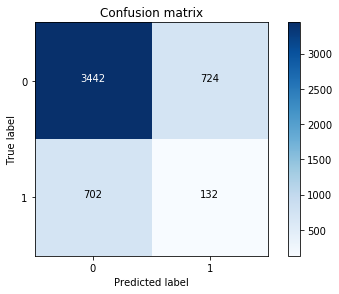

In [194]:
class_names = [0,1]
plt.figure()
plot_confusion_matrix(confusion_matrix_test_ada_smote , classes=class_names, title='Confusion matrix')
plt.show()

In [195]:
Accuracy_Test=(confusion_matrix_test_ada_smote[0,0]+confusion_matrix_test_ada_smote[1,1])/(confusion_matrix_test_ada_smote[0,0]+confusion_matrix_test_ada_smote[0,1]+confusion_matrix_test_ada_smote[1,0]+confusion_matrix_test_ada_smote[1,1])
TNR_Test_ada_smote= confusion_matrix_test_ada_smote[0,0]/(confusion_matrix_test_ada_smote[0,0] +confusion_matrix_test_ada_smote[0,1])
TPR_Test_ada_smote= confusion_matrix_test_ada_smote[1,1]/(confusion_matrix_test_ada_smote[1,0] +confusion_matrix_test_ada_smote[1,1])

print("Test TNR: ",TNR_Test_ada_smote)
print("Test TPR: ",TPR_Test_ada_smote)
print("Test Accuracy: ",Accuracy_Test)

Test TNR:  0.8262121939510322
Test TPR:  0.15827338129496402
Test Accuracy:  0.7148


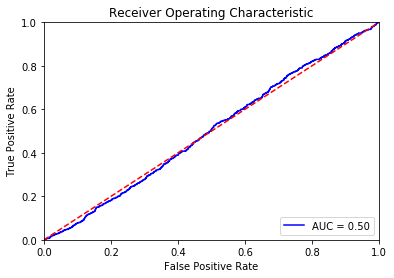

In [196]:
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(y_test, y_prob_test_ada_smote)
roc_auc_ada_smote = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_ada_smote)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [197]:
print("Train Accuracy: ", acc_train_ada_smote)
print("Test Accuracy: ", acc_test_ada_smote)
print("Train Auc: ", roc_auc_ada_smote)
print("Test TNR: ",TNR_Test_ada_smote)
print("Test TPR: ",TPR_Test_ada_smote)

Train Accuracy:  0.9425039010923059
Test Accuracy:  0.908
Train Auc:  0.4993938598521087
Test TNR:  0.8262121939510322
Test TPR:  0.15827338129496402


In [146]:
from prettytable import PrettyTable
t = PrettyTable(['Name','Train_accuracy', 'Test_accuracy', 'Roc_Auc', 'Test TNR', 'Test TPR'])
t.add_row(["Logistic Regression",acc_train_lr,acc_test_lr,roc_auc_lr,TNR_Test_lr,TPR_Test_lr])
t.add_row(["SVC",acc_train_svc,acc_test_svc,roc_auc_svc,TNR_Test_svc,TPR_Test_svc])
t.add_row(["DTC",acc_train_dtc,acc_test_dtc,roc_auc_dtc,TNR_Test_dtc,TPR_Test_dtc])
t.add_row(["RFC",acc_train_rfc,acc_test_rfc,roc_auc_rfc,TNR_Test_rfc,TPR_Test_rfc])
t.add_row(["ADABOOST_BASIC",acc_train_ada,acc_test_ada,roc_auc_ada,TNR_Test_ada,TPR_Test_ada])
t.add_row(["ADABOOST FINAL",acc_train_ada_final,acc_test_ada_final,roc_auc_ada_final,TNR_Test_ada_final,TPR_Test_ada_final])
t.add_row(["GBC BASIC",acc_train_gbm,acc_test_gbm,roc_auc_gbm,TNR_Test_gbm,TPR_Test_gbm])
t.add_row(["GBC FINAL",acc_train_gbm_final,acc_test_gbm_final,roc_auc_gbm_final,TNR_Test_gbm_final,TPR_Test_gbm_final])
t.add_row(["XGBOOST BASIC",acc_train_xgb,acc_test_xgb,roc_auc_xgb,TNR_Test_xgb,TPR_Test_xgb])
#t.add_row(["XGBOOST FINAL",acc_train_xgb_final,acc_test_xgb_final,roc_auc_xgb_final,TNR_Test_xgb_final,TPR_Test_xgb_final])
t.add_row(["BAGGING",acc_train_bag,acc_test_bag,roc_auc_bag,TNR_Test_bag,TPR_Test_bag])
t.add_row(["BALANCED BAGGING",acc_train_bbc,acc_test_bbc,roc_auc_bbc,TNR_Test_bbc,TPR_Test_bbc])
t.add_row(["SMOTE ADABOOST",acc_train_ada_smote,acc_test_ada_smote,roc_auc_ada_smote,TNR_Test_ada_smote,TPR_Test_ada_smote])
 
print(t.get_string(title="Results")) 

+---------------------+--------------------+---------------+--------------------+--------------------+--------------------+
|         Name        |   Train_accuracy   | Test_accuracy |      Roc_Auc       |      Test TNR      |      Test TPR      |
+---------------------+--------------------+---------------+--------------------+--------------------+--------------------+
| Logistic Regression | 0.9990998199639928 |     0.9986    | 0.9994408520042817 | 0.9985604606525912 | 0.9987980769230769 |
|         SVC         | 0.9803960792158432 |     0.9724    | 0.992848874898494  | 0.9954414587332053 | 0.8569711538461539 |
|         DTC         |        1.0         |      1.0      |        1.0         |        1.0         |        1.0         |
|         RFC         |        1.0         |      1.0      |        1.0         |        1.0         |        1.0         |
|    ADABOOST_BASIC   |        1.0         |      1.0      |        1.0         |        1.0         |        1.0         |
|    ADA

In [147]:
print("\n Classification report Logistic Classification \n", classification_report(y_test,y_pred_test_lr))
print("\n Classification report  SVC \n", classification_report(y_test,y_pred_test_svc))
print("\n Classification report DTC \n", classification_report(y_test,y_pred_test_dtc))
print("\n Classification report RFC \n", classification_report(y_test,y_pred_test_rfc))
print("\n Classification report ADABOOST BASIC\n", classification_report(y_test,y_pred_test_ada))
print("\n Classification report ADABOOST FINAL \n", classification_report(y_test,y_pred_test_ada_final))
print("\n Classification report GBM BASIC \n", classification_report(y_test,y_pred_test_gbm))
print("\n Classification report GBM FINAL \n", classification_report(y_test,y_pred_test_gbm_final))
print("\n Classification report XGBOOST BASIC \n", classification_report(y_test,y_pred_test_xgb))
#print("\n Classification report XGBOOST FINAL \n", classification_report(y_test,y_pred_test_xgb_final))
print("\n Classification report BAGGING \n", classification_report(y_test,y_pred_test_bag))
print("\n Classification report BALANCED BAGING \n", classification_report(y_test,y_pred_test_bbc))
print("\n Classification report ADAMOOST & SMOTE \n", classification_report(y_test,y_pred_test_ada_smote))


 Classification report Logistic Classification 
              precision    recall  f1-score   support

          0       1.00      1.00      1.00      4168
          1       0.99      1.00      1.00       832

avg / total       1.00      1.00      1.00      5000


 Classification report  SVC 
              precision    recall  f1-score   support

          0       0.97      1.00      0.98      4168
          1       0.97      0.86      0.91       832

avg / total       0.97      0.97      0.97      5000


 Classification report DTC 
              precision    recall  f1-score   support

          0       1.00      1.00      1.00      4168
          1       1.00      1.00      1.00       832

avg / total       1.00      1.00      1.00      5000


 Classification report RFC 
              precision    recall  f1-score   support

          0       1.00      1.00      1.00      4168
          1       1.00      1.00      1.00       832

avg / total       1.00      1.00      1.00      5000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
